In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>


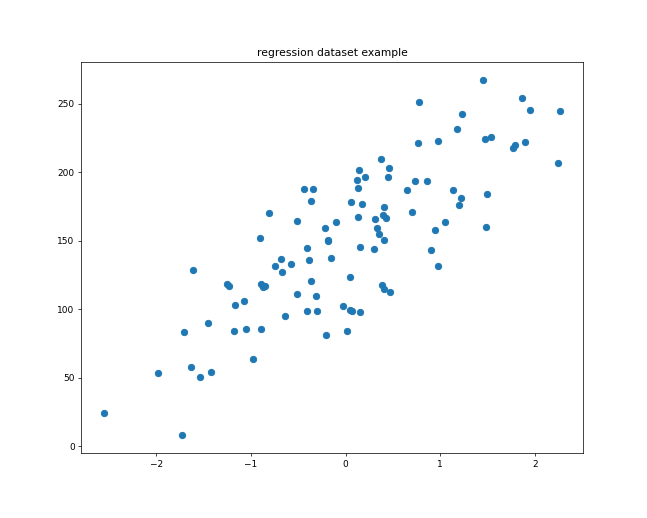

In [2]:
from sklearn.datasets import make_regression
plt.figure(figsize=(10,8))
plt.title("regression dataset example")
X_R1,y_R1=make_regression(n_samples=100,n_features=1,n_informative=1,bias=150.0,noise=30,random_state=0)
'''
The number of informative features, i.e., the number of features used to build the linear model used to generate the output.

'''
plt.scatter(X_R1,y_R1,marker='o',s=50)
plt.show()

In [3]:
from matplotlib.colors import ListedColormap
cmap_bold=ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

<IPython.core.display.Javascript object>


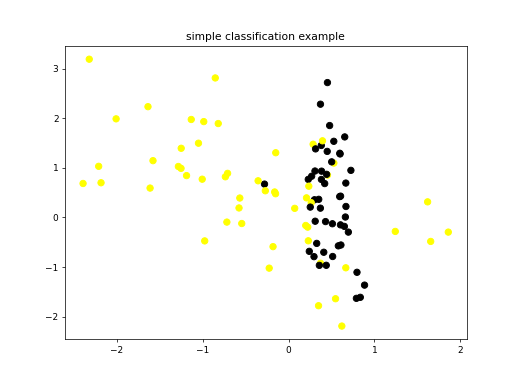

In [4]:
from sklearn.datasets import make_classification
plt.figure(figsize=(8,6))
plt.title('simple classification example')
X_C1,y_C1=make_classification(n_samples=100,n_features=2,n_informative=2,n_redundant=0,n_classes=2,n_clusters_per_class=1,flip_y=0.1,class_sep=0.5,random_state=0)

plt.scatter(X_C1[:,0],X_C1[:,1],c=y_C1,marker='o',s=50,cmap=cmap_bold)
plt.show()

<IPython.core.display.Javascript object>


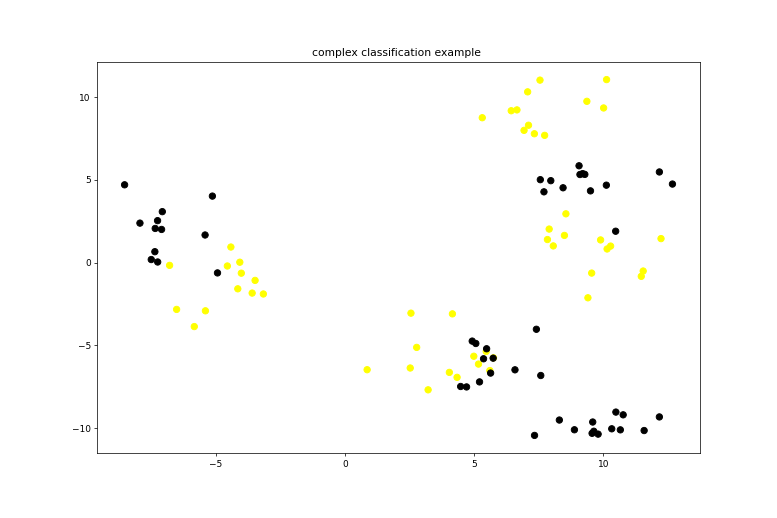

In [5]:
from sklearn.datasets import make_blobs
X_D2,y_D2=make_blobs(n_samples=100,n_features=2,centers=8,cluster_std=1.3,random_state=4)
y_D2=y_D2%2
plt.figure(figsize=(12,8))
plt.title('complex classification example ')
plt.scatter(X_D2[:,0],X_D2[:,1],c=y_D2,s=50,marker='o',cmap=cmap_bold)
plt.show()

<IPython.core.display.Javascript object>


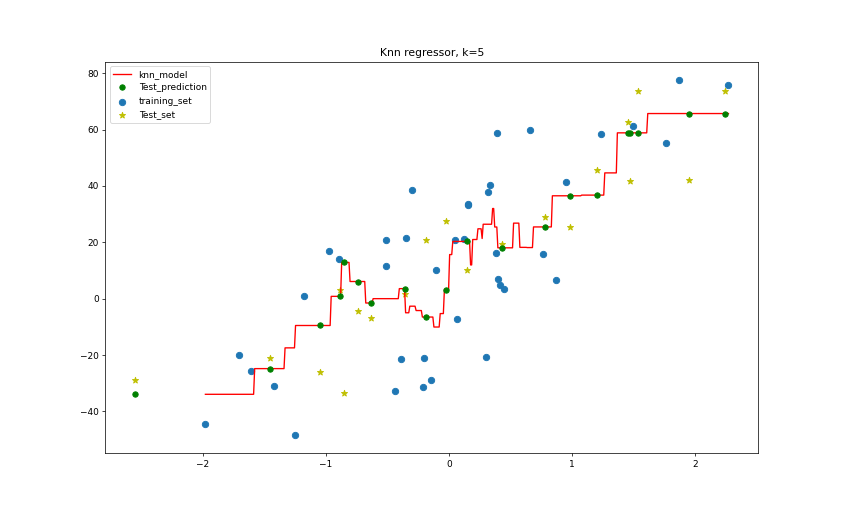

train_socre  0.5870250659088287
test_score  0.7348096119757415


In [34]:
X,y=make_regression(n_samples=60,n_features=1,n_targets=1,n_informative=1,bias=10,noise=20,random_state=0)
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X[:40],y[:40])
plt.figure(figsize=(13,8))
plt.scatter(X[:40],y[:40],marker='o',s=50,label='training_set')

plt.plot(np.linspace(min(X[:40]),max(X[:40]),num=500),knn_reg.predict(np.linspace(min(X[:40]),max(X[:40]),num=500)),'r-',label='knn_model')
plt.plot(X[40:],knn_reg.predict(X[40:]),'go',label='Test_prediction')
plt.scatter(X[40:],y[40:],marker='*',s=50,c='y',label='Test_set')
plt.title('Knn regressor, k=5')
plt.legend(loc='best')
plt.show()
print('train_socre ',knn_reg.score(X[:40],y[:40]))
print('test_score ',knn_reg.score(X[40:],y[40:]))

<IPython.core.display.Javascript object>


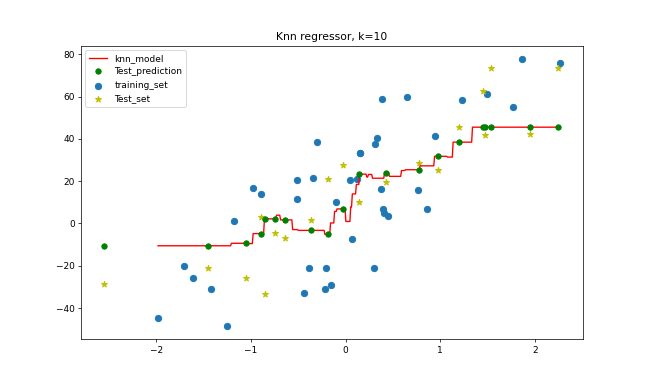

train_socre  0.5304729687658958
test_score  0.7303576519542575


In [35]:
# X,y=make_regression(n_samples=60,n_features=1,n_targets=1,n_informative=1,bias=10,noise=20,random_state=0)
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X[:40],y[:40])
plt.figure(figsize=(10,6))
plt.scatter(X[:40],y[:40],marker='o',s=50,label='training_set')

plt.plot(np.linspace(min(X[:40]),max(X[:40]),num=500),knn_reg.predict(np.linspace(min(X[:40]),max(X[:40]),num=500)),'r-',label='knn_model')
plt.plot(X[40:],knn_reg.predict(X[40:]),'go',label='Test_prediction')
plt.scatter(X[40:],y[40:],marker='*',s=50,c='y',label='Test_set')
plt.title('Knn regressor, k=10')
plt.legend(loc='best')
plt.show()
print('train_socre ',knn_reg.score(X[:40],y[:40]))
print('test_score ',knn_reg.score(X[40:],y[40:]))

<IPython.core.display.Javascript object>


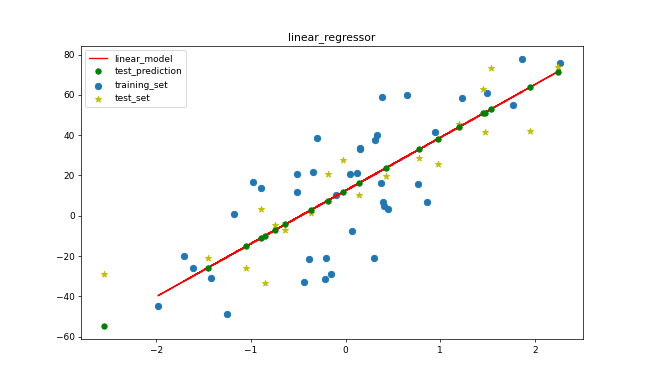

intercept   12.495279189986833
coef   [26.32194498]
train_score  0.5746156014402581
test_score 0.8341579012023301


In [19]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X[:40],y[:40])
plt.figure(figsize=(10,6))
plt.scatter(X[:40],y[:40],s=50,marker='o',label='training_set')
plt.plot(X[:40],(linear_model.coef_)*X[:40]+linear_model.intercept_,'r-',label='linear_model')
plt.plot(X[40:],(linear_model.coef_)*X[40:]+linear_model.intercept_,'go',label='test_prediction')
plt.scatter(X[40:],y[40:],s=50,marker='*',c='y',label='test_set')
plt.title('linear_regressor')
plt.legend(loc='best')
plt.show()
print('intercept  ',linear_model.intercept_)
print('coef  ',linear_model.coef_)
print('train_score ',linear_model.score(X[:40],y[:40]))
print('test_score',linear_model.score(X[40:],y[40:]))

# RIDGE REGRESSION

In [52]:
from sklearn.linear_model import Ridge
linridge=Ridge(alpha=2)
linridge.fit(X[:40],y[:40])
print('train_score ',linridge.score(X[:40],y[:40]))
print('test_score ',linridge.score(X[40:],y[40:]))

train_score  0.5730793867953508
test_score  0.8414994951744057


# LASSO REGRESSION

In [77]:
from sklearn.linear_model import Lasso
linlasso=Lasso(alpha=1,max_iter=2000)
linlasso.fit(X[:40],y[:40])
print('train_score ',linlasso.score(X[:40],y[:40]))
print('test_score ',linlasso.score(X[40:],y[40:]))

train_score  0.717464807434916
test_score  0.9143869239374689


# MINMAXSCALER

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_X_train=scaler.fit_transform(X[:40])
scaled_X_test=scaler.transform(X[40:])
linear_model2=LinearRegression()
linear_model2.fit(scaled_X,y[:40])
print('linear model train_score ',linear_model2.score(scaled_X_train,y[:40]))
print('linear model test_score',linear_model2.score(scaled_X_test,y[40:]))

linear model train_score  0.7186245767294335
linear model test_score 0.9102534753617239


# **Polynomial features****

In [95]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
poly_X=poly.fit_transform(X)
linear_model3=LinearRegression()
linear_model3.fit(poly_X[:40],y[:40])
print('linear model train_score ',linear_model3.score(poly_X[:40],y[:40]))
print('linear model test_score',linear_model3.score(poly_X[40:],y[40:]))

linear model train_score  0.7227959951682048
linear model test_score 0.9166161918992822
[ 1.         -0.20515826  0.04208991] [0.15494743]
